In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

<bound method NDFrame.head of       male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4235     0   48              1        20.0     NaN                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0

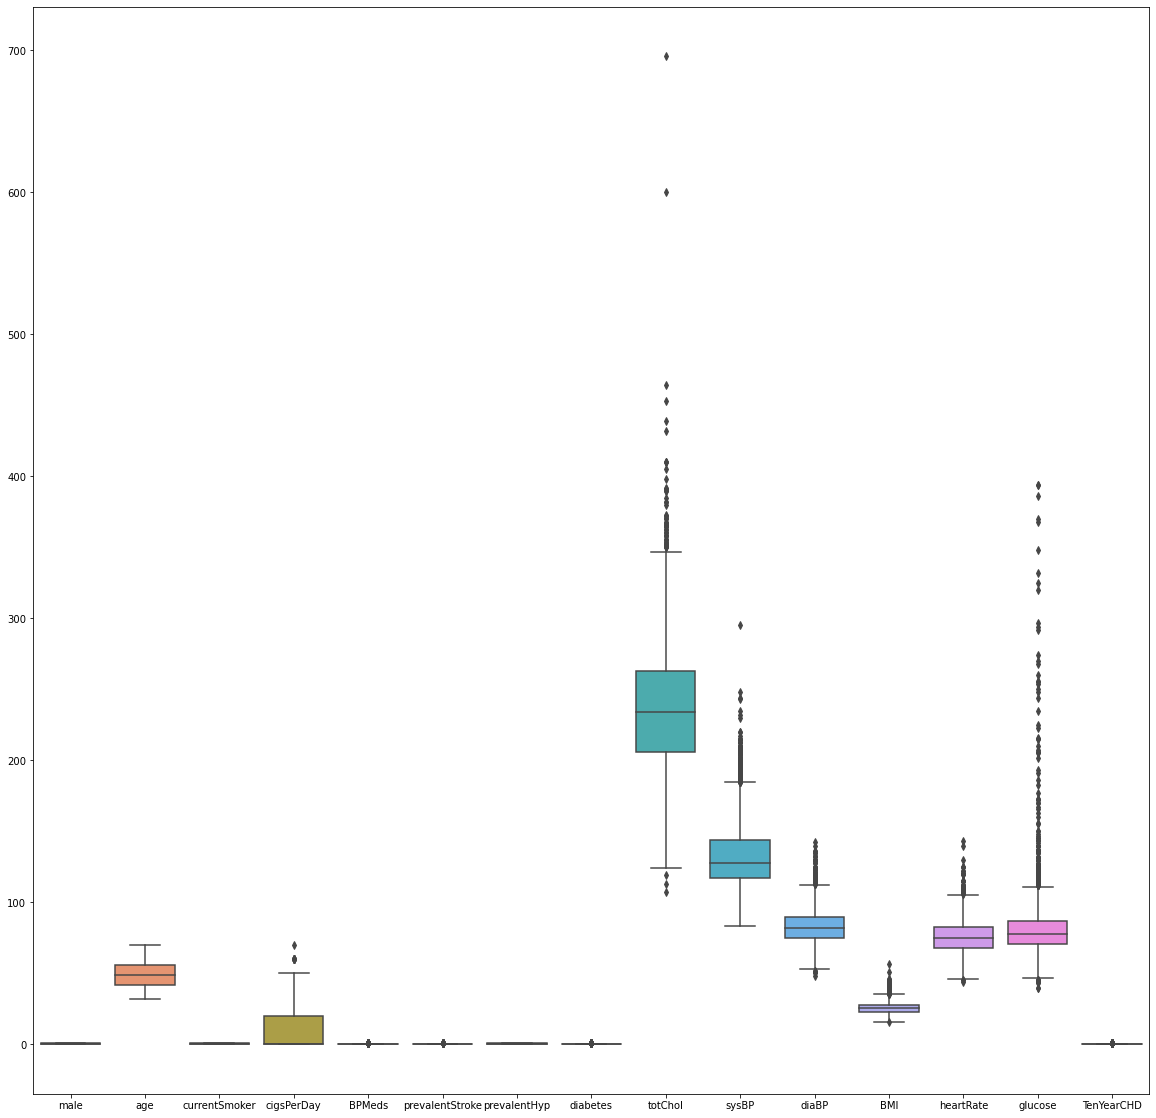

In [4]:

#importing dataset

dataset = pd.read_csv('framingham.csv')
dataset= dataset.drop("education",axis=1)
plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=dataset)
#plt.show()
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset.head

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('framingham.csv')
data = data.dropna(how='any',axis=0) 
X = data.iloc[:,0:15]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs       Score
10         sysBP  669.136021
14       glucose  379.914235
1            age  296.200344
9        totChol  250.490205
4     cigsPerDay  155.798307
11         diaBP  142.521814
7   prevalentHyp   82.845455
8       diabetes   31.067621
5         BPMeds   28.191569
0           male   17.107751


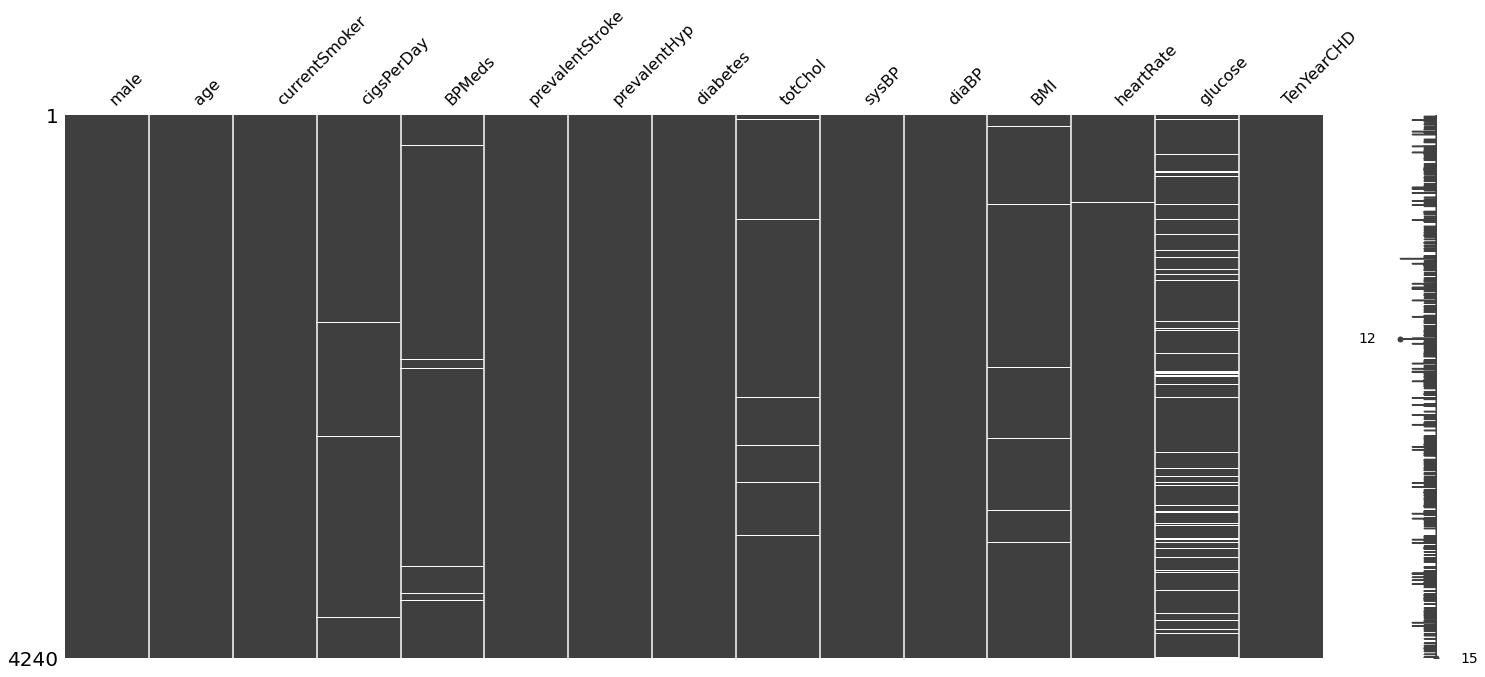

In [4]:
# to check for missing values in each column the white line represents the missing values

import missingno as msno
msno.matrix(dataset)

In [7]:
#fixing the missing data by inserting by the mean of the column in plave of null
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

In [8]:
# to split the dataset training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2
,random_state=0)

In [9]:
#feature scaling
#Feature Scaling is a technique to standardize the independent features present
#in the data in a fixed range. It is performed during the data pre-processing to
#handle highly varying magnitudes or values or units. If feature scaling is not done, 
#then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values
#regardless of the unit of the values
#in other words normalisaton of data
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [20]:
import numpy as np
import pandas as pd

  

# Logistic Regression model created from scratch

class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
        # update weights   
        
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      

      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) ) # the eaquation of logistic regression
        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [21]:
from sklearn.linear_model import LogisticRegression
lg=LogitRegression(learning_rate=3,iterations=1000)#my model

lg1=LogisticRegression() #inbuilt model
lg.fit(x_train,y_train)
lg1.fit(x_train,y_train)
y_pred = lg.predict(x_test)
y_pred1=lg1.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy of my model ' ,accuracy_score(y_test,y_pred))
print('Accuracy of sklearn model ' ,accuracy_score(y_test,y_pred1))

Accuracy of my model  0.8608490566037735
Accuracy of sklearn model  0.8608490566037735


In [23]:
from sklearn.metrics import confusion_matrix #https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
                                                #check for what confusion matrix is
cm = confusion_matrix(y_test,y_pred)
cm1=confusion_matrix(y_test,y_pred1)
print(cm)
print(cm1)

[[720   2]
 [116  10]]
[[720   2]
 [116  10]]


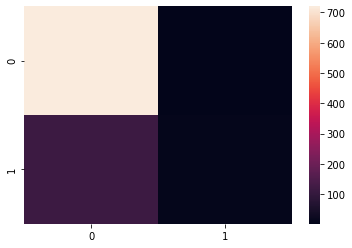

In [24]:
import seaborn as sns#plotting the confusioon matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)))
plt.show()

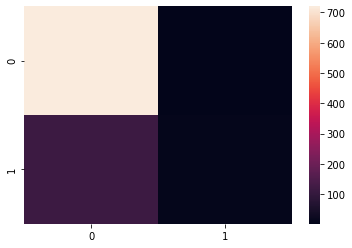

In [15]:
import seaborn as sns
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)))
plt.show()